
# Netnaija Data Wrangling and Analysis
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">summary</a></li>
</ul>
<a name = "intro"></a>

## Introduction
> Netnaija is media download center created in March of 2016. The project aims at
scraping data from the movies section that has been uploaded from 2016 till
date and answering some questions from the data.Questions intended to be
answered are:
> 1. Which year has the highest number of upload?
2. number of movies uploaded by month in the year 2019
3. What movies has highest movie length?
4. Stars with most number of movies
5. Find movies which Scott Adkin was an actor
6. How long from on average from offical release of movie to site upload
7. Trend between release and Update
8. Compared top 4 genre with others genre in a pie chart
9. What movie got movie people talking most and what is the summary
10. Upload trend

<a name = "wrangling"></a>
## Data Wrangling

In [1]:
#imports required packages
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reads dataset
df=pd.read_csv('../Dataset/netnaija_movie.csv')
df=df.drop('Unnamed: 0', axis=1)

In [3]:
df.head(4)

,titles,movie_types,time_of_uplos,movie_lengths,num_of_comments,Genres,Release_Dates,Starss,Languages,Subtitles,movie_linkss,imdb_links,mo_summarys
0,Clean (2022),['Movies'],Jan 28,['01:33:27'],['56'],"[' Crime, Drama, Thriller']","Release Date: Jan 28, 2022 (United States)","[' Adrien Brody, Glenn Fleshler, Richie Merritt']",[' English'],[' English'],https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Revenge is a dirty business.</em>
1,The Ice Age Adventures of Buck Wild (2022),['Movies'],Jan 28,['01:21:05'],['81'],"[' Adventure, Animation, Comedy, Family']","Release Date: Jan 28, 2022 (United States)","[' Simon Pegg, Vincent Tong, Aaron Harris']",[' English'],[' English'],https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Disney+ gets wild.</em>
2,In the Forest (2022),['Movies'],Jan 28,['01:23:11'],['39'],"[' Horror, Thriller']","Release Date: Jan 28, 2022 (United States)","[' Debbon Ayer, Cristina Spruell, Lyman Ward']",[' English'],[' English'],https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,Helen and her daughter Emily reluctantly accom...
3,Twice Bitten (2021),['Movies'],Jan 28,['01:28:07'],['18'],"[' Jul 11, 2021 (United States)']","Stars: LisaRaye McCoy, Ledisi, Kevin A. Walton...",[' Twice.Bitten.2021.1080p.AMZN.WEBRip.DDP2.0....,[' English'],"[' https', '//www.imdb.com/title/tt14191916/']",https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,An unmitigated and sexy conman targets his nex...


In [4]:
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 3073
number of columns are: 13


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titles           3073 non-null   object
 1   movie_types      3073 non-null   object
 2   time_of_uplos    3073 non-null   object
 3   movie_lengths    3073 non-null   object
 4   num_of_comments  3073 non-null   object
 5   Genres           3073 non-null   object
 6   Release_Dates    3073 non-null   object
 7   Starss           3073 non-null   object
 8   Languages        3073 non-null   object
 9   Subtitles        3073 non-null   object
 10  movie_linkss     3073 non-null   object
 11  imdb_links       3073 non-null   object
 12  mo_summarys      3073 non-null   object
dtypes: object(13)
memory usage: 312.2+ KB


In [6]:
df.columns

Index(['titles', 'movie_types', 'time_of_uplos', 'movie_lengths',
       'num_of_comments', 'Genres', 'Release_Dates', 'Starss', 'Languages',
       'Subtitles', 'movie_linkss', 'imdb_links', 'mo_summarys'],
      dtype='object')

In [7]:
#renames columns
df=df.rename(columns={
    'time_of_uplos':'Upload_date',
    'movie_lengths':'Movie_length',
    'titles':'Title',
    'movie_types':'Movie_type',
    'Genres':'Genres',
    'Release_Dates':'Release_date',
    'Starss':'Stars',
    'num_of_comments':'Num_of_comments',
    'Languages':'Language',
    'Subtitles':'Subtitle',
    'movie_linkss':'Movie_link',
    'imdb_links':'Imdb_link', 
    'mo_summarys':'Movie_summary'
    })

In [8]:
#Function to remove brackets, comma and appostrophies
def rmbracket(columns):
    columns=columns.str.replace('[','')
    columns=columns.str.replace(']','')
    columns=columns.str.replace('\'','')
    return columns

In [9]:
# Removes brackets and apostrophies in below columns
df['Title']=rmbracket(df['Title'])
df['Movie_type']=rmbracket(df['Movie_type'])
df['Movie_length']=rmbracket(df['Movie_length'])
df['Num_of_comments']=rmbracket(df['Num_of_comments'])
df['Genres']=rmbracket(df['Genres'])
df['Stars']=rmbracket(df['Stars'])
df['Language']=rmbracket(df['Language'])
df['Subtitle']=rmbracket(df['Subtitle'])
df['Movie_summary']=df['Movie_summary'].str.replace('<em>','')
df['Movie_summary']=df['Movie_summary'].str.replace('</em>','')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            3073 non-null   object
 1   Movie_type       3073 non-null   object
 2   Upload_date      3073 non-null   object
 3   Movie_length     3073 non-null   object
 4   Num_of_comments  3073 non-null   object
 5   Genres           3073 non-null   object
 6   Release_date     3073 non-null   object
 7   Stars            3073 non-null   object
 8   Language         3073 non-null   object
 9   Subtitle         3073 non-null   object
 10  Movie_link       3073 non-null   object
 11  Imdb_link        3073 non-null   object
 12  Movie_summary    3073 non-null   object
dtypes: object(13)
memory usage: 312.2+ KB


In [11]:
# Match year pattern which are always in 4 consercutive digits
year_matched=df['Title'].str.findall('(\d{4})')

Year = []
for i in year_matched:
    try:
        Year.append(i[-1])
    except:
        Year.append(np.nan)
        
# MAkes a new column for year
df['year']=Year    

In [12]:
#split the upload date into month and year
month_year_split=df['Upload_date'].str.split(',')

month_day = []
for i in month_year_split:
    try:
        month_day.append(f'{i[0]} ')
    except:
        month_day.append(np.nan)
        
df['Month_day']=month_day

In [13]:
df['Upload_date'] = df['Month_day'] + df['year'] 
df['Upload_date']=pd.to_datetime(df['Upload_date']) 

In [14]:
# convert movie length to a time delta
df['Movie_length']=pd.to_timedelta(df['Movie_length'], errors ='coerce')

In [15]:
# convert Num_of_comments to integer dtype
df['Num_of_comments']=df['Num_of_comments'].astype(int)

In [16]:
#cleanng the title column
df['Title']=df['Title'].str.replace('(\d{4})','', regex=True)
df['Title']=df['Title'].str.strip(r'()')
df['Title']=df['Title'].str.replace(r'(','', regex=True)
df['Title']=df['Title'].str.replace(r')','', regex=True)
df['Title']=df['Title'].str.rstrip(r' ')

In [17]:
# Replace missing values with NAN
df=df.replace('missing',np.nan)
df.isnull().sum()

Title                0
Movie_type           0
Upload_date          4
Movie_length         1
Num_of_comments      0
Genres              86
Release_date        86
Stars               86
Language           173
Subtitle           227
Movie_link           0
Imdb_link           83
Movie_summary        0
year                 4
Month_day            0
dtype: int64

In [18]:
#In the subtitle column some have \n newline which will be removed and some contain links which will be replace by none.
#Fromat the Subtitle column
df['Subtitle']=df['Subtitle'].str.strip(' ')
df['Subtitle']=df['Subtitle'].str.strip(r'\n')
df['Subtitle']=df['Subtitle'].str.strip(r'\xa0')
df['Subtitle']=df['Subtitle'].str.replace('https.*','None', regex=True)
df['Subtitle']=df['Subtitle'].str.replace('English.*','English', regex=True)
df['Subtitle']=df['Subtitle'].str.replace('Kore.*','Korean', regex=True)
df['Subtitle']=df['Subtitle'].str.replace('N/A.*','None)', regex=True)
df['Subtitle']=df['Subtitle'].str.replace('Chinese.*','Chinese', regex=True)
df['Subtitle']=df['Subtitle'].str.replace('None.*','None', regex=True)

In [19]:
#Fromat the release date column
df['Release_date']=df['Release_date'].str.strip(' ')
df['Release_date']=df['Release_date'].str.strip('Release Date:')
df['Release_date']=df['Release_date'].str.replace('\(.*', '',regex=True)
df['Release_date']=pd.to_datetime(df['Release_date'], errors ='coerce')

In [20]:
#cleaning the the language columns
df['Language']=df['Language'].str.strip(' ')
df['Language']=df['Language'].str.strip(r'\xa0')
df['Language']=df['Language'].str.replace('Engl.*','English', regex=True)
df['Language']=df['Language'].str.replace('Boy.*','English', regex=True)

df['Language']=df['Language'].str.replace('Kore.*','Korean', regex=True)
df['Language']=df['Language'].str.replace('Mala.*','Malay', regex=True)
df['Language']=df['Language'].str.replace('Filipin.*','Filipino', regex=True)
df['Language']=df['Language'].str.replace('Indone.*','Indonesian', regex=True)
df['Language']=df['Language'].str.replace('Italia.*','Italian', regex=True)

df['Language']=df['Language'].str.replace('Japan.*','Japanese', regex=True)
df['Language']=df['Language'].str.replace('Germa.*','German', regex=True)
df['Language']=df['Language'].str.replace('Span.*','Spanish', regex=True)
df['Language']=df['Language'].str.replace('Frenc.*','French', regex=True)

india = ['Hind.*', 'India.*','india.*', 'Tami.*','Telug.*', 'Saty.*']
for x in india:
    df['Language']=df['Language'].str.replace(x,'Indian', regex=True)
    
Chinese = ['Chine.*', 'Manda.*', 'Canton.*']
for x in Chinese:
    df['Language']=df['Language'].str.replace(x,'Chinese', regex=True)


In [21]:
df.columns

Index(['Title', 'Movie_type', 'Upload_date', 'Movie_length', 'Num_of_comments',
       'Genres', 'Release_date', 'Stars', 'Language', 'Subtitle', 'Movie_link',
       'Imdb_link', 'Movie_summary', 'year', 'Month_day'],
      dtype='object')

In [22]:
df=df.drop(df[df['year']=='2011'].index)
df=df.drop(df[df['year']=='2013'].index)

In [23]:
# drop NaN row and column not relevant to analysis
df=df.dropna()
df=df.drop(['year','Month_day','Imdb_link','Movie_link'], axis=1)

In [24]:
df.head(4)

,Title,Movie_type,Upload_date,Movie_length,Num_of_comments,Genres,Release_date,Stars,Language,Subtitle,Movie_summary
0,Clean,Movies,2022-01-28,0 days 01:33:27,56,"Crime, Drama, Thriller",2022-01-28,"Adrien Brody, Glenn Fleshler, Richie Merritt",English,English,Revenge is a dirty business.
1,The Ice Age Adventures of Buck Wild,Movies,2022-01-28,0 days 01:21:05,81,"Adventure, Animation, Comedy, Family",2022-01-28,"Simon Pegg, Vincent Tong, Aaron Harris",English,English,Disney+ gets wild.
2,In the Forest,Movies,2022-01-28,0 days 01:23:11,39,"Horror, Thriller",2022-01-28,"Debbon Ayer, Cristina Spruell, Lyman Ward",English,English,Helen and her daughter Emily reluctantly accom...
4,The Fallout,Movies,2022-01-27,0 days 01:36:00,34,Drama,2022-01-27,"Jenna Ortega, Shailene Woodley, Julie Bowen",English,English,Nothing will ever be the same.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2903
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Title            2501 non-null   object         
 1   Movie_type       2501 non-null   object         
 2   Upload_date      2501 non-null   datetime64[ns] 
 3   Movie_length     2501 non-null   timedelta64[ns]
 4   Num_of_comments  2501 non-null   int64          
 5   Genres           2501 non-null   object         
 6   Release_date     2501 non-null   datetime64[ns] 
 7   Stars            2501 non-null   object         
 8   Language         2501 non-null   object         
 9   Subtitle         2501 non-null   object         
 10  Movie_summary    2501 non-null   object         
dtypes: datetime64[ns](2), int64(1), object(7), timedelta64[ns](1)
memory usage: 234.5+ KB


In [26]:
#set index as Upload_date
df=df.set_index(df['Upload_date'])

<a name = "eda"></a>
## Exploratory Data Analysis

### 1. Which year has the highest number of upload?

In [27]:
#resamples by year
year_counts=df['Upload_date'].resample('Y').count()

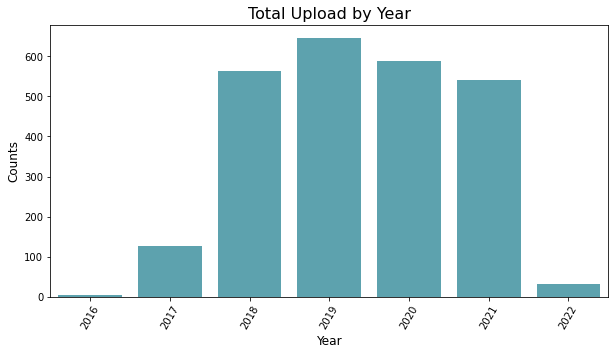

In [28]:
#bar graph
fig = plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index.year, y=year_counts, color='#4fabbc' )
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Total Upload by Year',fontsize=16)
plt.xticks(rotation=60);

### 2. Find the number of movies by month in the year 2019


In [29]:
#resample data by month
count_2019=df['Upload_date']['2019'].resample('M').count()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]

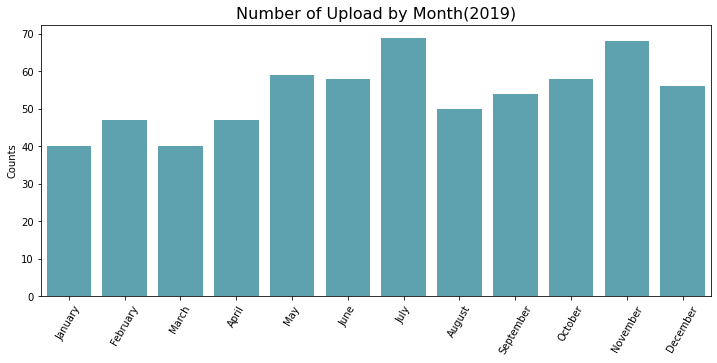

In [30]:
# bar graph
fig = plt.figure(figsize=(12,5))
sns.barplot(x=month, y=count_2019.values, color='#4fabbc' )
plt.ylabel('Counts')
plt.title('Number of Upload by Month(2019)', fontsize=16)
plt.xticks(rotation=60);

### 3. What movies has highest movie length?

In [31]:
df[df['Movie_length']==str(df['Movie_length'].max())][['Title','Movie_length']]

,Title,Movie_length
Upload_date,,
2021-03-18,Zack Snyders Justice League,0 days 04:02:03


### 4. Stars with most number of movies

In [32]:
#splits stars in each rows
split_star=df['Stars'].apply(lambda x: x.split(','))

In [33]:
# function to to append each star in in a star_list
star_list=[]
def stt(split_star):
    for star in split_star:
        star_list.append(star)

In [34]:
#Apply the function and conert the the list to pandas series
stars=split_star.apply(lambda x: stt(x))
stars=pd.Series(star_list)
stars=stars.str.strip(' ')

In [35]:
#Top 3 stars with most number of movies
stars.value_counts().head(3)

Nicolas Cage         13
Bruce Willis         10
Samuel L. Jackson     9
dtype: int64

### 5. Find movies which Scott Adkins acted


In [36]:
df[df['Stars'].str.contains('Scott Adkins')][['Title','Stars']]

,Title,Stars
Upload_date,,
2021-11-05,One Shot,"Scott Adkins, Ashley Greene, Ryan Phillippe"
2020-11-13,Dead Reckoning,"K.J. Apa, Scott Adkins, James Remar"
2020-10-02,Seized DVDRip,"Scott Adkins, Mario Van Peebles, Steven Elder"
2020-07-28,Legacy of Lies,"Scott Adkins, Honor Kneafsey, Andrea Vasiliou"
2020-05-29,Debt Collectors,"Scott Adkins, Louis Mandylor, Vladimir Kulich"
2019-05-24,Avengement,"Scott Adkins, Craig Fairbrass, Thomas Turgoose"
2018-05-10,Incoming,"Scott Adkins, Dominic Power, Aaron McCusker"
2018-02-08,Accident Man,"Scott Adkins, Ray Stevenson, Ashley Greene"


### 6. How long from on average from offical release of movie to site upload


In [37]:
release_upload=df[['Upload_date','Release_date']]

In [38]:
release_upload['diff']=abs(release_upload['Upload_date'].dt.day - release_upload['Release_date'].dt.day)

In [39]:
avg=round(release_upload['diff'].mean())
print(f'it take an average of {avg} days from release date to been uploaded on net_naija ')

it take an average of 7 days from release date to been uploaded on net_naija 


### 7. Trend between release and Update

In [40]:
trend=release_upload.resample('Y').mean()

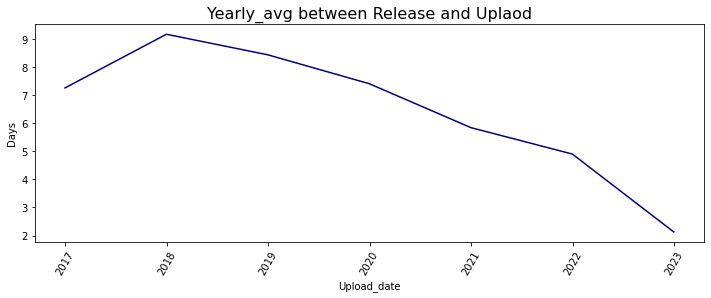

In [41]:
fig = plt.figure(figsize=(12,4))
sns.lineplot(x=trend.index, y=trend['diff'],color='navy')
plt.title('Yearly_avg between Release and Uplaod', fontsize=16,)
plt.xticks(rotation=60)
plt.ylabel('Days');

### 8. Compared top 4 genre with others genre in a pie chart


In [42]:
#split all genre and append to a list
split_genre=df['Genres'].apply(lambda x: x.split(','))
genre_list=[]
def stt(split_genre):
    for genre in split_genre:
        genre_list.append(genre)

In [43]:
#convert list to a seris
genres=split_genre.apply(lambda y: stt(y))
genres=pd.Series(genre_list)

In [44]:
# clean the genre series
genres=genres.str.strip(r'\xa0')
genres=genres.str.strip(' ')
genres=genres.str.replace('Dra.*','Drama', regex=True)
genres=genres.str.replace('Sci.*','Sci-Fi', regex=True)
genres=genres.str.replace('Adven.*','Adventure', regex=True)
genres=genres.str.replace('Hor.*','Horror', regex=True)                          
genres=genres.str.replace('Co.*','Comedy', regex=True)
genres=genres.str.replace('Ac.*','Action', regex=True)
genres=genres.str.replace('cri.*','Crime', regex=True)
genres=genres.value_counts()

In [45]:
ADTC_col=['Action','Drama','Thriller','Comedy']
ADTC=list(genres[ADTC_col].values)

In [46]:
Others=genres.drop(ADTC_col).sum()
ADTC.insert(4, Others)

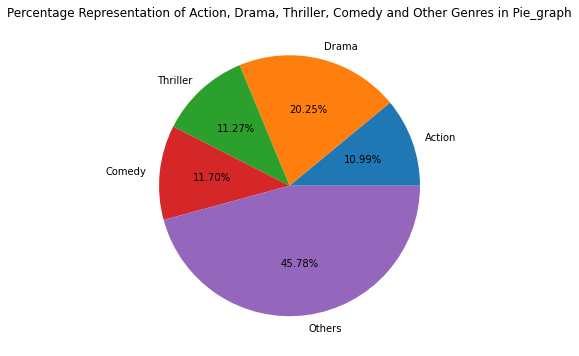

In [47]:
# pie chart
plt.figure(figsize = (6,6))
plt.title(f'Percentage Representation of Action, Drama, Thriller, Comedy and Other Genres in Pie_graph')
plt.pie(ADTC, labels = ['Action', 'Drama' ,'Thriller', 'Comedy', 'Others'], autopct = '%1.2f%%');

### 9. What movie got movie people talking most

In [48]:
df[df['Num_of_comments']==df['Num_of_comments'].max()]['Title']

Upload_date
2021-07-29    Fast and Furious 9: The Fast Saga
Name: Title, dtype: object

### 10. Upload Trend

In [49]:
Trend=df.resample('m').count()['Title']

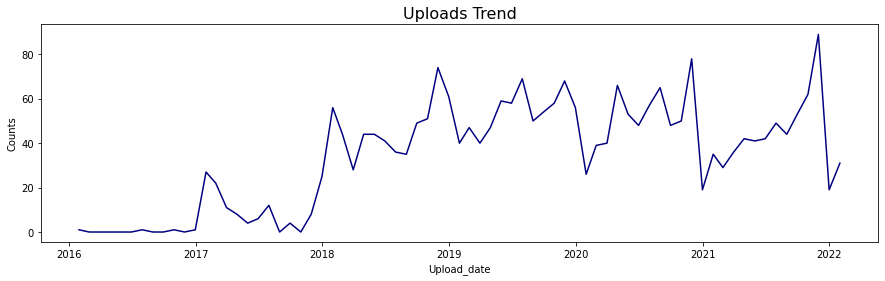

In [50]:
plt.figure(figsize=(15,4))
plt.title('Uploads Trend', fontsize=16,)
plt.ylabel('Counts')
sns.lineplot(x=Trend.index, y=Trend, color='navy');

<a name = "conclusions"></a>
### Summary
>Data was scraped from Netnaija with beautifulllsoup
and request library. Scraped data contains 3073
rows and 13 columns.
Pandas was used to clean wrangle the data and
after the process 82% of row and 11 columns were
left for the analysis
Answer were gotten to initally proposed questions
after the anlaysis. Question like star with the most
number of movie and How long from on average
from offical release of movie to site upload were
found to Nicolas Cage and 7 days.
Full report here

### Author 
[Achimugu A.S](https://www.github.com/sachimugu)

In [51]:
!jupyter nbconvert --to html Data_Wrangling_and_EDA.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_and_EDA.ipynb to html
[NbConvertApp] Writing 782892 bytes to Data_Wrangling_and_EDA.html
